In [1]:
# k is the number of clusters u want, k means
# unsupervised learning now, we told machine what classes of features et are
# flat clusteirng and hierarchal clustering
# flat clustering, u tell machine to find how many groups u want
# hierarchal, machine decides how many there ought to be

# centroids are centers of clusters, can pick the first k data points or random or whatever
# centroids are centers of the clusters, randomly chosen at first
# calculate distance of each feature set to the centroids,
#and classify each of them as whichever centroid they are closer to
#like nearby dots will be paired with each centorid
# take the mean of the feature sets to find center of each cluster
# Algo is u keep taking new centroids and doing this until centorids are dont moving
# ur optimized if centorid doesnt move much anymore, max iteration variable too

# one downside is groups tend to be classified in similarly sized groups
# due to adherence to euclidean distance, kernels can help a ltitle bit but still problem
# scaling problem too, but once trainded, classifying is easy


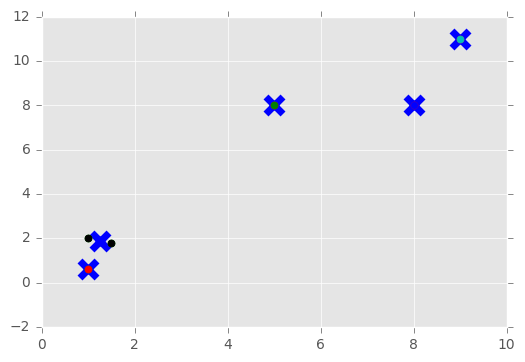

In [75]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])

#plt.scatter(X[:,0],X[:,1],s=150, linewidths=5)
#plt.show()

clf = KMeans(n_clusters=5)
clf.fit(X)

centroids = clf.cluster_centers_ #(x)
labels = clf.labels_ # array of labels of features (y)

colors = 10*['g.','r.','c.','b.','k.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1],colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=150, linewidths = 5)
plt.show()

In [81]:
import pandas as pd
from sklearn import preprocessing
#already imported kmeans n stuff

# still doing own feature engineering
df = pd.read_excel('/Users/chrisosufsen/Downloads/titanic.xls')
df.drop(['body','name','boat','sex'],1,inplace=True) # intersting thought, filter out 'important' names, like royal last names
df.convert_objects(convert_numeric=True) # convert data frame to numeric, easier to work with
df.fillna(0, inplace=True)

#some data is very important but not numerical
#what u wanna do is take list of column, set of column (just the unique values)
# so the st is ['male', 'female'] for this, and their value is 0 or 1
# if theres a lot of values tho, might have outliers
# lot of missing data too

# handle nonnumeric
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {} # like 'female':1
        def convert_to_int(val):
            return text_digit_vals[val]
        
        # if not numeric 
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents) #gets us unique elements
            x = 0
            # populate the dictionary with unique elements
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            #whatever that column is, convert those values to our ints that we specified in the dictionary
            df[column] = list(map(convert_to_int, df[column]))
            
    return df
df = handle_non_numeric_data(df)
#df.head()

/Users/chrisosufsen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [82]:
# now to run the algorithm
X2 = np.array(df.drop(['survived'], 1))
X2 = preprocessing.scale(X2) # transform data to cleaner set...
y2 = np.array(df['survived'])

clf2 = KMeans(n_clusters = 2)
clf2.fit(X2)

correct = 0
for i in range(len(X2)):
    predict_me = np.array(X2[i]) # x values to predict
    predict_me = predict_me.reshape(-1,len(predict_me))
    prediction = clf2.predict(predict_me) #predict the values
    if prediction[0]==y2[i]: # id they're the same
        correct +=1
print(correct/len(X2))

0.32238349885408707
